In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns  # 시각화 라이브러리


In [2]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
train = pd.read_csv('data/data.csv', index_col = 'day_text')

### 결측치 채우기

In [4]:
#결측치 확인
train.isnull().sum()

time_text         0
team_text         0
location          0
H_text            0
HR_text           0
S_text            0
ST_text           0
DU_text           0
ER_text           0
result_text       0
temp              0
rain           7212
wind              2
d_wind            2
humidity          0
atmosphere        0
surface           2
dtype: int64

In [5]:
#결측치 0으로 채우기
train['rain'] = train['rain'].fillna('0')
train['wind'] = train['wind'].fillna('0')
train['d_wind'] = train['d_wind'].fillna('0')
train['surface'] = train['surface'].fillna('0')

In [6]:
train.isnull().sum()

time_text      0
team_text      0
location       0
H_text         0
HR_text        0
S_text         0
ST_text        0
DU_text        0
ER_text        0
result_text    0
temp           0
rain           0
wind           0
d_wind         0
humidity       0
atmosphere     0
surface        0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_text    10230 non-null  object 
 1   team_text    10230 non-null  object 
 2   location     10230 non-null  object 
 3   H_text       10230 non-null  int64  
 4   HR_text      10230 non-null  int64  
 5   S_text       10230 non-null  int64  
 6   ST_text      10230 non-null  int64  
 7   DU_text      10230 non-null  int64  
 8   ER_text      10230 non-null  int64  
 9   result_text  10230 non-null  int64  
 10  temp         10230 non-null  float64
 11  rain         10230 non-null  object 
 12  wind         10230 non-null  object 
 13  d_wind       10230 non-null  object 
 14  humidity     10230 non-null  int64  
 15  atmosphere   10230 non-null  float64
 16  surface      10230 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.4+ MB


<AxesSubplot:>

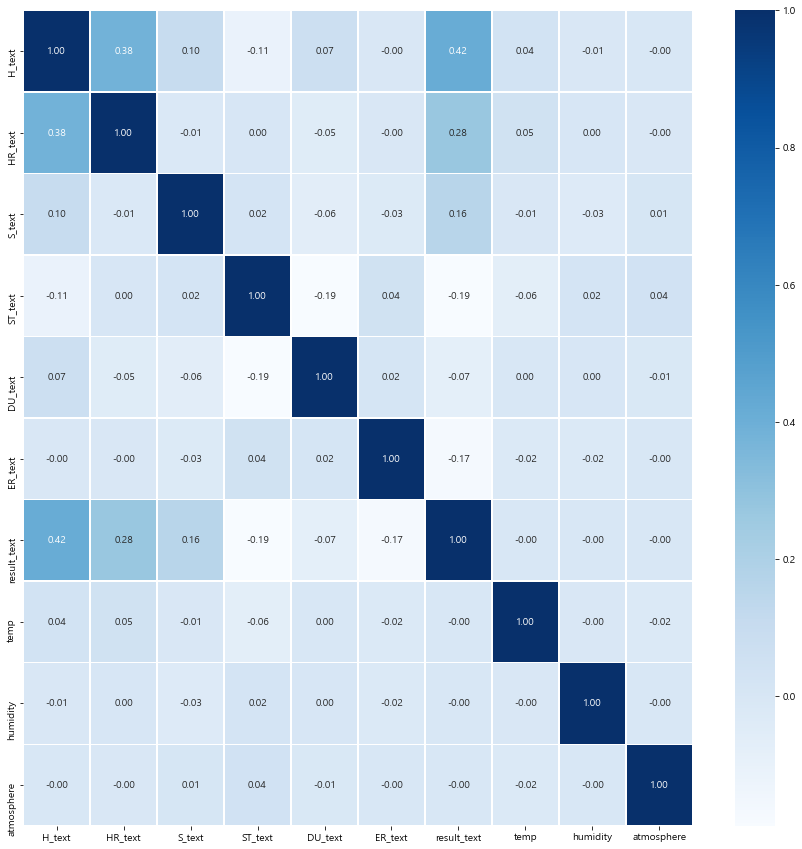

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
train['rain'] = train['rain'].astype('float64')
train['wind'] = train['wind'].astype('float64')
train['d_wind'] = train['d_wind'].astype('float64')
train['atmosphere'] = train['atmosphere'].astype('float64')
train['surface'] = train['surface'].astype('float64')

### 원핫인코딩

In [10]:
cat_feature = ['team_text','location']

In [11]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    train = pd.concat([train, dummy], axis = 1)
    train.drop(i, axis=1, inplace = True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           10230 non-null  object 
 1   H_text              10230 non-null  int64  
 2   HR_text             10230 non-null  int64  
 3   S_text              10230 non-null  int64  
 4   ST_text             10230 non-null  int64  
 5   DU_text             10230 non-null  int64  
 6   ER_text             10230 non-null  int64  
 7   result_text         10230 non-null  int64  
 8   temp                10230 non-null  float64
 9   rain                10230 non-null  float64
 10  wind                10230 non-null  float64
 11  d_wind              10230 non-null  float64
 12  humidity            10230 non-null  int64  
 13  atmosphere          10230 non-null  float64
 14  surface             10230 non-null  float64
 15  team_text_KIA 타이거즈  10230 non-null  uint8  
 16  team_t

### 데이터 7:3으로 나누기

In [13]:
#7대 3으로 데이터 나누기
X = train.drop('HR_text',axis = 1)
y = train['HR_text']

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.2,
                                                  stratify = y,
                                                  random_state = 1)

In [14]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(8184, 32) (8184,) (2046, 32) (2046,)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.11월 to 5.30토
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           8184 non-null   object 
 1   H_text              8184 non-null   int64  
 2   S_text              8184 non-null   int64  
 3   ST_text             8184 non-null   int64  
 4   DU_text             8184 non-null   int64  
 5   ER_text             8184 non-null   int64  
 6   result_text         8184 non-null   int64  
 7   temp                8184 non-null   float64
 8   rain                8184 non-null   float64
 9   wind                8184 non-null   float64
 10  d_wind              8184 non-null   float64
 11  humidity            8184 non-null   int64  
 12  atmosphere          8184 non-null   float64
 13  surface             8184 non-null   float64
 14  team_text_KIA 타이거즈  8184 non-null   uint8  
 15  team_text_LG 트윈스    8184 non-null   uint8  
 16  team_t

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 9.24목 to 5.15일
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           2046 non-null   object 
 1   H_text              2046 non-null   int64  
 2   S_text              2046 non-null   int64  
 3   ST_text             2046 non-null   int64  
 4   DU_text             2046 non-null   int64  
 5   ER_text             2046 non-null   int64  
 6   result_text         2046 non-null   int64  
 7   temp                2046 non-null   float64
 8   rain                2046 non-null   float64
 9   wind                2046 non-null   float64
 10  d_wind              2046 non-null   float64
 11  humidity            2046 non-null   int64  
 12  atmosphere          2046 non-null   float64
 13  surface             2046 non-null   float64
 14  team_text_KIA 타이거즈  2046 non-null   uint8  
 15  team_text_LG 트윈스    2046 non-null   uint8  
 16  team_t

### Time_text Drop

In [17]:
X_train.drop('time_text', axis = 1 , inplace = True)

C:\Users\smhrd\anaconda3\envs\deep\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_test.drop('time_text', axis = 1, inplace = True)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 9.24목 to 5.15일
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              2046 non-null   int64  
 1   S_text              2046 non-null   int64  
 2   ST_text             2046 non-null   int64  
 3   DU_text             2046 non-null   int64  
 4   ER_text             2046 non-null   int64  
 5   result_text         2046 non-null   int64  
 6   temp                2046 non-null   float64
 7   rain                2046 non-null   float64
 8   wind                2046 non-null   float64
 9   d_wind              2046 non-null   float64
 10  humidity            2046 non-null   int64  
 11  atmosphere          2046 non-null   float64
 12  surface             2046 non-null   float64
 13  team_text_KIA 타이거즈  2046 non-null   uint8  
 14  team_text_LG 트윈스    2046 non-null   uint8  
 15  team_text_NC 다이노스   2046 non-null   uint8  
 16  team_t

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.11월 to 5.30토
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              8184 non-null   int64  
 1   S_text              8184 non-null   int64  
 2   ST_text             8184 non-null   int64  
 3   DU_text             8184 non-null   int64  
 4   ER_text             8184 non-null   int64  
 5   result_text         8184 non-null   int64  
 6   temp                8184 non-null   float64
 7   rain                8184 non-null   float64
 8   wind                8184 non-null   float64
 9   d_wind              8184 non-null   float64
 10  humidity            8184 non-null   int64  
 11  atmosphere          8184 non-null   float64
 12  surface             8184 non-null   float64
 13  team_text_KIA 타이거즈  8184 non-null   uint8  
 14  team_text_LG 트윈스    8184 non-null   uint8  
 15  team_text_NC 다이노스   8184 non-null   uint8  
 16  team_t

In [21]:
set(X_train.columns) - set(X_test.columns)

set()

### KNNRegressor

In [22]:
knn_model = KNeighborsRegressor(n_neighbors = 10)
result1 = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result1

array([ 0.0169352 ,  0.01617798,  0.03321059, -0.00654323, -0.01231203])

In [23]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [24]:
print("테스트 세트 예측: {}".format(knn_model.predict(X_test)))

테스트 세트 예측: [0.6 0.5 0.6 ... 1.4 1.  1.1]


In [25]:
print("테스트 세트 정확도: {:.2f}".format(knn_model.score(X_test, y_test)))

테스트 세트 정확도: 0.03


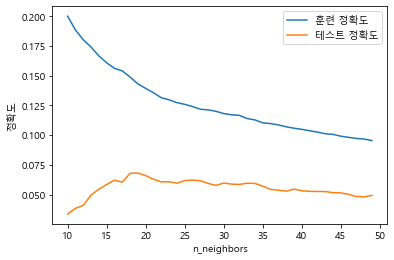

In [26]:

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(10, 50)

for n_neighbors in neighbors_settings:
    # 모델 생성
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(knn_model.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(knn_model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### Lasso

In [27]:
from sklearn.linear_model import Lasso

In [28]:
# alpha : 0.01 ~ 100 사이 / 값 범위가 크다. (default = 1)
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [29]:
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))

train score:  0.0831523234779954
test score :  0.083074948316603


In [30]:
lasso_model.coef_

array([ 0.03706241, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ])

In [31]:
np.sum(lasso_model.coef_ == 0)

30

In [32]:
# np.sum() 함수
# True 의 개수를 세어줌

np.sum(lasso_model.coef_ != 0)

1

In [33]:
# False = 가중치 0
# True = 가중치가 0이 아님

lasso_model.coef_ == 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [34]:
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

사용한 특성의 개수 :  1


In [35]:
# alpha 값을 낮춰주면 사용하는 특성의 개수가 늘어난다.

lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

train score:  0.18850960936150407
test score :  0.1749760798190253
사용한 특성의 개수 :  15


In [36]:
# alpha 값을 낮춰주면 사용하는 특성의 개수가 늘어난다.

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

train score:  0.19578155566724986
test score :  0.1774306311725815
사용한 특성의 개수 :  25


#### 그래디언트 부스칭 회귀트리

### https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [37]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.1.0


In [38]:
X_train

,H_text,S_text,ST_text,DU_text,ER_text,result_text,temp,rain,wind,d_wind,humidity,atmosphere,surface,team_text_KIA 타이거즈,team_text_LG 트윈스,team_text_NC 다이노스,team_text_SK 와이번스,team_text_kt wiz,team_text_두산 베어스,team_text_롯데 자이언츠,team_text_삼성 라이온즈,team_text_키움 히어로즈,team_text_한화 이글스,location_광주,location_대구,location_대전,location_부산,location_서울,location_수원,location_인천,location_창원
day_text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8.11월,11,1,10,1,0,1,27.6,0.0,2.4,320.0,42,994.2,23.5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9.7금,6,1,7,1,1,0,24.1,0.0,0.7,320.0,61,1008.5,24.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7.8일,7,0,13,1,0,0,21.8,0.0,1.8,50.0,81,1008.7,21.9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7.30화,10,0,4,0,1,1,28.3,0.0,3.7,200.0,76,996.1,26.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5.28화,9,2,7,1,0,0,20.1,0.0,1.0,180.0,96,998.4,20.4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.24화,8,0,6,0,0,1,18.6,0.0,0.9,360.0,75,999.2,19.7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8.31토,11,4,9,1,0,1,27.8,0.0,2.4,230.0,50,1003.3,26.9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9.21토,14,2,8,0,0,1,30.2,0.0,2.5,290.0,30,1006.5,34.2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [39]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [40]:
model = build_model()

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2048      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,273
Trainable params: 6,273
Non-trainable params: 0
_________________________________________________________________


In [42]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

InternalError:  Blas GEMM launch failed : a.shape=(10, 31), b.shape=(31, 64), m=10, n=64, k=31
	 [[node sequential/dense/MatMul (defined at <ipython-input-42-08ecb023f3dd>:2) ]] [Op:__inference_distributed_function_234]

Function call stack:
distributed_function


In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)
